# Classification with Logistic regression and SVM 

**What you will learn today**: You will learn how to implement a classifier. First we will analyze a toy example in which we will use a logistic classifier coded from scratch. Once we understood the logic behind the algorithm we will use the black box Sklearn one for recognizing hand-written digits. You will also implement SVM classifier on a different dataset to get familiar with this important family of algorithm.

# 1) Logistic regression from scratch

Let us generate a synthetic dataset using a multivariate Gaussian distribution

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
num_observations = 500

x1 = np.random.multivariate_normal([0, 0], [[1, .5],[.5, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .8],[.8, 1]], num_observations)

dataset = np.vstack((x1, x2)).astype(np.float32)
labels = np.hstack((np.zeros(num_observations),np.ones(num_observations)))

dataset[:5]

array([[-1.7277927 , -1.3276355 ],
       [-1.9680586 ,  0.27283463],
       [-1.1287137 , -2.1059916 ],
       [-0.7471221 , -0.8984793 ],
       [-0.1159091 ,  0.2946894 ]], dtype=float32)

Let's plot our data

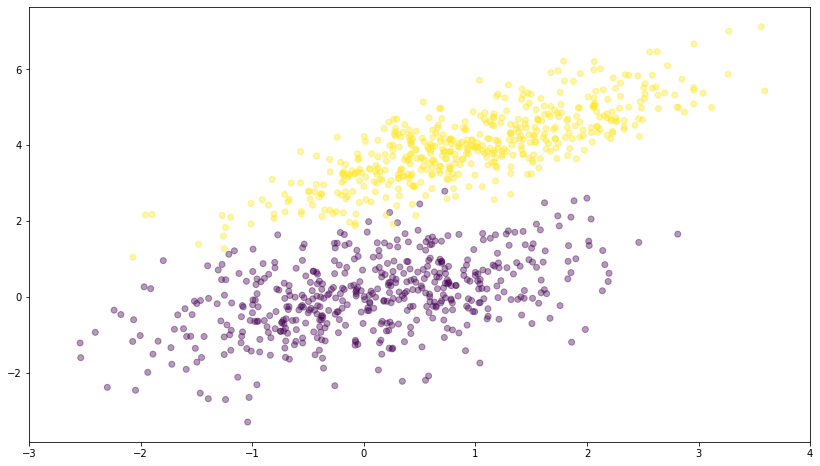

In [19]:
plt.figure(figsize=(14,8))
plt.xlim(-3,4)
plt.scatter(dataset[:, 0], dataset[:, 1],c = labels, alpha = .4)

Our goal is to use a logistic function to fit our dataset. In this case:
$$P_{\rm model}(y_i|{\vec w} \cdot {\vec x_i}) = \frac {e^{({\vec w} \cdot {\vec x_i})y_i}}{1+\exp({\vec w} \cdot {\vec x_i})}$$
such that
$$P_{\rm model}(y_i=1)  = \frac {\exp{({\vec w} \cdot {\vec x_i})}}{1+\exp({\vec w} \cdot {\vec x_i})}  = \frac {1}{1+\exp(-{\vec w} \cdot {\vec x_i})}~~~ \text{and}~~~ P_{\rm model}(y_i=0)  = \frac {1}{1+\exp({\vec w} \cdot {\vec x_i})}  = \frac {\exp{(-{\vec w} \cdot {\vec x_i})}}{1+\exp(-{\vec w} \cdot {\vec x_i})}$$


Now, we can either use the cross-entropy loss and write:
$$\mathcal{L}(\vec{w}) = - \sum_{i=1}^n \sum_{y_i=0,1} y_i \log P_{\rm model}(y_i) +  (1-y_i) \log (1 - P_{\rm model}(y_i)) $$
or equivalently write a maximum-likelihood problem with
$$
\mathcal{L}(\vec{w}|\vec{\bm{x}},\bm{y}) \propto \sum_i \log P_{\rm model}(y_i|{\vec w} \cdot {\vec x_i})
$$
In both cases, the problem boils down to minimizing the following loss:
$$\mathcal{L}(\vec {w}) =  \sum_{i=1}^n - y_i {\vec {w}} \cdot {\vec x}_i  + \log{(1+\exp({\vec w} \cdot {\vec x}_i ))} $$

Let us implement these function:

In [20]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))
def log_loss(features, target, weights): 
    scores = np.dot(features, weights)
    ll = np.sum( -target*scores + np.log(1 + np.exp(scores)) )
    return ll

In order to perform optimization, we need to compute the gradient and perform gradient descent. Here we have:

$$\nabla_{\vec w} \mathcal{L}(\vec w) =  \sum_{i = 1}^n - y_i  {\vec x}_i  + {\vec x}_i  \frac{\exp({\vec w} \cdot {\vec x}_i )}{(1+\exp({\vec w} \cdot {\vec x}_i ))} = - \sum_{i = 1}^n {\vec x}_i^T (y_i - P(y_i=1)) $$

We can now write the  logistic regression

##### **Exercise 1**

##### Try writing Gradient Descent using this Loss, as we did in the previous exercise session

In [21]:
def logistic_regression(features, target, num_steps, learning_rate):

    weights = np.zeros(features.shape[1])##Initialization from 0
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = -np.dot(features.T, output_error_signal)
        weights -= learning_rate * gradient
        
        # Print log-likelihood from time to time
        if step % 10000 == 0:
            print (step," ",log_loss(features, target, weights))
        
    return weights

Remember theoretical lectures? 

We use the usual trick of adding a "1" to the data so that we can actually linear fitting, and call the regression function

In [22]:
intercept = np.ones((dataset.shape[0], 1))
data_with_intercept = np.hstack((intercept, dataset))

We then run the actual GD algorithm

In [23]:
weights = logistic_regression(data_with_intercept, labels, num_steps = 300000, learning_rate = 5e-5)

0   645.1976320327615
10000   32.75119183235916
20000   27.095065275891347
30000   24.836811224952655
40000   23.593936566289756
50000   22.80311265097039
60000   22.255870323028482
70000   21.855786948699013
80000   21.55169925537929
90000   21.313784058969752
100000   21.123421954281326
110000   20.968362287170734
120000   20.840203784078465
130000   20.73298834864264
140000   20.642371669382296
150000   20.56511136858102
160000   20.498738918089245
170000   20.441342465252298
180000   20.391419037920038
190000   20.347771512096894
200000   20.309435249829754
210000   20.275624876363835
220000   20.245695018470045
230000   20.219110905131664
240000   20.195426054123935
250000   20.174265128187443
260000   20.15531061555199
270000   20.138292375753824
280000   20.12297935729693
290000   20.10917297922539


Now we can plot the prediction from our model, and check how good they are on the training dataset

In [24]:
def line(x,a,b,c):
    return -x*b/c-a/c
def myline(x):
    a = weights[0]
    b = weights[1]
    c = weights[2]
    return -x*b/c-a/c

final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

print('Accuracy: {0}'.format((preds == labels).sum().astype(float) / len(preds)))

Accuracy: 0.991


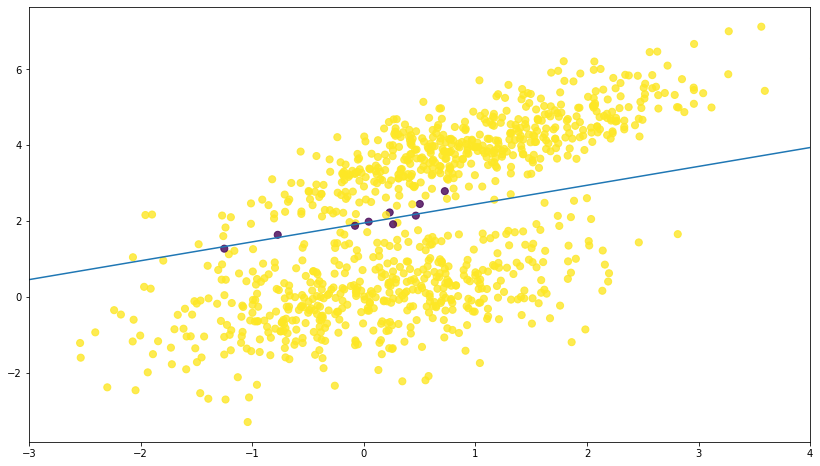

In [37]:
plt.figure(figsize = (14, 8))
plt.scatter(dataset[:, 0], dataset[:, 1],
            c = (preds == labels) , alpha = .8, s = 50)
plt.xlim([-3,4])
plt.plot([-3,4],[myline(-3),myline(4)])

In high dimensional statistics problems, it is often the case that the number of points are of the same order as the dimension. Let us mimick this by using fewer points in dimension 2!

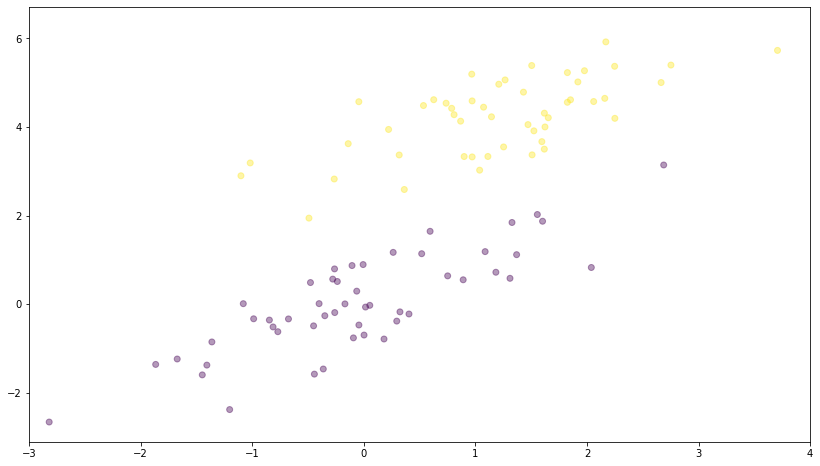

In [25]:
num_observations = 50

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

dataset = np.vstack((x1, x2)).astype(np.float32)
labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))
plt.figure(figsize=(14,8))
plt.xlim([-3,4])
plt.scatter(dataset[:, 0], dataset[:, 1], c = labels, alpha = .4)

Of course, we could just redo our fit

In [42]:
intercept = np.ones((dataset.shape[0], 1))
data_with_intercept = np.hstack((intercept, dataset))

weights = logistic_regression(data_with_intercept, labels,num_steps = 100000, learning_rate = 1e-1)

0   286.2328341681544
10000   0.019667818859505838
20000   0.010212291816254604
30000   0.006927105183058292
40000   0.005250797739170419
50000   0.004231954956592695
60000   0.003546444260762973
70000   0.0030533371009731657
80000   0.0026814213507360004
90000   0.002390807921291514


Accuracy: 1.0


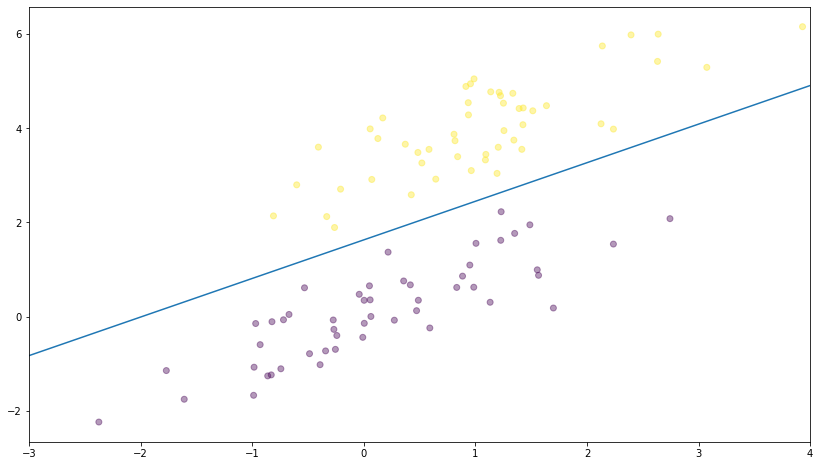

In [44]:
def myline(x):
    return line(x,weights[0],weights[1],weights[2])

plt.figure(figsize=(14,8))
plt.xlim([-3,4])
plt.scatter(dataset[:, 0], dataset[:, 1], c = labels, alpha = .4)
plt.plot([-3,4],[myline(-3),myline(4)])

final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))
print('Accuracy: {0}'.format((preds == labels).sum().astype(float) / len(preds)))

# 2) Logistic regression on real dataset 



Let us use the fantastic notebooks from https://physics.bu.edu/~pankajm/MLnotebooks.html, a terrific book for ML newcomers especially if they come from physics. We will consider again our friend MNIST, remember the lecture on KNN? First a bit of history on this famous dataset:


The MNIST classification problem is one of the classical ML problems for learning classification on high-dimensional data with a fairly sizable number of examples (60000). Yann LeCun and collaborators collected and processed $70000$ handwritten digits (60000 are used for training and 10000 for testing) to produce what became known as one of the most widely used datasets in ML: the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. Each handwritten digit comes in a grayscale square image in the shape of a $28\times 28$ pixel grid. Every pixel takes a value in the range $[0,255]$, representing $256$ nuances of the gray color. The problem of image classification finds applications in a wide range of fields and is important for numerous industry applications of Machine Learning.

 ### SoftMax regression:
 Before we consider two possible labels for our data, you can easily guess that it is amenable to have more than one in this case. 

 Do not worry! We can easily generalize what we said before. 


We will use SoftMax regression, which can be thought of as a statistical model which assigns a probability that a given input image corresponds to any of the 10 handwritten digits. The model is a generalization of the logistic regression and reads:
$$
p(y_i=j|\vec{x}_i;\vec{w}) = \frac{e^{-\vec{w}_j^T \vec{x}}}{\sum_{k=0}^9 e^{-\vec{w}_k^T\vec{x} }},
$$
Where $p(y_i=j|\vec{x}_i;\vec{w})$ is the probability that input $\vec{x}_i$ is the $j$-th digit, $j\in[0,9]$.
The model also has 10 weight vectors $\vec{w}_j$ which we will train below. Finally, one can use this information for prediction by taking the value of $y_i$ for which this probability is maximized:
\begin{align}
y_{pred}=\arg\max_i p(y=i|\vec{x})
\end{align}

First thing to do is to import the dataset and preprocess the data:


In [2]:
import time


from sklearn.datasets import fetch_openml # MNIST data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

print(__doc__)

# Turn down for faster convergence
train_size = 60000
test_size = 10000

### load MNIST data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


Automatically created module for IPython interactive environment


In [3]:
X = np.asarray(X)
y = np.asarray(y)

Let's plot an image to see how it looks like with plt.imshow.

'4'

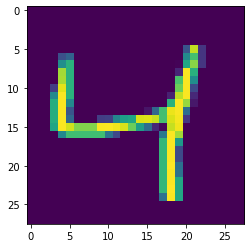

In [4]:
plt.imshow(X[2,:].reshape(28,28))
y[2]

We shuffle the data and we do the test-train splitting.

In [5]:
# shuffle data
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))
# pick training and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=train_size,test_size=test_size)

We preproccess the data and use StandardScaler to have zero mean and unit variance. Pay attention that we do that only on the training set!

In [6]:
# scale data to have zero mean and unit variance [required by regressor]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

**Exercise** 
- You need to learn how to read a Python documentation. Search on the internet how to implement softmax regression with Sklearn.
- Fix the value of the regularization to be $10^{-5}$. Fit the data and compute two quantities: 
  - Sparsity of the weights (percentage of non-zero weights)
  - Score (i.e. accuracy)
- HINT: look at the *LogisticRegression* function!!

In [7]:
# apply logistic regressor with 'sag' solver, C is the inverse regularization strength
t0=time.time()
clf = LogisticRegression(C=1e5,
                         multi_class='multinomial',
                         penalty='l2', solver='sag', tol=0.1)
# fit data
clf.fit(X_train, y_train)
# percentage of nonzero weights
sparsity = np.mean(clf.coef_ == 0) * 100
# compute accuracy
score = clf.score(X_test, y_test)

#display run time
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)

print("Sparsity with L2 penalty: %.2f%%" % sparsity)
print("Test score with L2 penalty: %.4f" % score)

Example run in 6.981 s
Sparsity with L2 penalty: 8.42%
Test score with L2 penalty: 0.6722


##### Let us see how we can actually plot the weights against the pixels!!

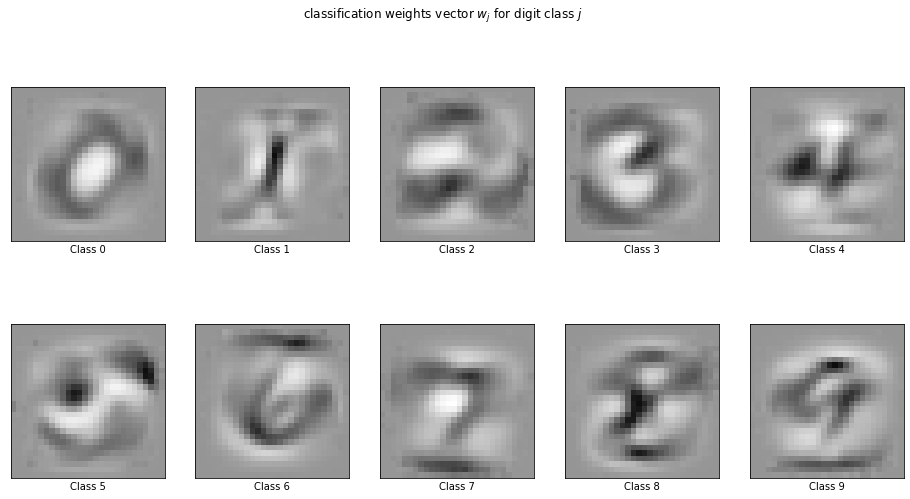

In [8]:
# plot weights vs the pixel position
coef = clf.coef_.copy()
plt.figure(figsize=(16, 8))
scale = np.abs(coef).max()
for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Class %i' % i)
plt.suptitle('classification weights vector $w_j$ for digit class $j$')
plt.show()

# 3) SVM Classification on real dataset 


**Exercise**
- Repeat what you did for softmax regression for an Support Vector Machine (SVM) linear classifier.
- Go and search the Python doc for SVM classifier. Choose the linear one (we will see other in following lectures)
- Fit the data using the default value of regularization and compare with an optimized value using CV.

Clear and friendly reference can be found here: https://www.kaggle.com/nishan192/mnist-digit-recognition-using-svm. 

PS: If you do not know Kaggle, you should check it out!

In [9]:
from sklearn.svm import LinearSVC

In [10]:
# scale data to have zero mean and unit variance [required by regressor]
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)
X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [11]:
# using linear kernel, C=1, default value of gamma

# model
model = LinearSVC(loss='hinge',max_iter=10000,C=0.01)

# fit
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

/Users/ghio/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [12]:
model.score(X_test,y_test)

0.7383571428571428

We can also fine-tune the parameter with cross-validation. 

In [13]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pandas as pd


In [14]:

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'C': [10e-4,10e-3,0.01,0.1,1]}]


# specify model
model = LinearSVC(loss="hinge",max_iter=1000)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/ghio/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ghio/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ghio/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ghio/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/ghio/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinea

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=LinearSVC(loss='hinge'),
             param_grid=[{'C': [0.001, 0.01, 0.01, 0.1, 1]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [15]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,17.850718,1.385174,0.096893,0.073010,0.001,{'C': 0.001},0.891161,0.889821,0.893393,0.888929,...,0.891125,0.001619,5,0.899196,0.898504,0.898259,0.899018,0.898460,0.898687,0.000357
1,23.494204,0.852239,0.069760,0.026800,0.01,{'C': 0.01},0.906250,0.907857,0.910804,0.909375,...,0.908714,0.001545,3,0.923058,0.922612,0.921540,0.922143,0.922121,0.922295,0.000511
2,21.344145,0.398750,0.025953,0.005153,0.01,{'C': 0.01},0.906071,0.907411,0.910804,0.908929,...,0.908500,0.001624,4,0.923080,0.922723,0.921674,0.922121,0.922054,0.922330,0.000504
3,61.285106,3.126070,0.073387,0.008655,0.1,{'C': 0.1},0.909821,0.911339,0.913929,0.912946,...,0.911857,0.001432,1,0.931920,0.932500,0.931451,0.931406,0.932388,0.931933,0.000456
4,194.056303,9.928319,0.120802,0.033871,1,{'C': 1},0.906429,0.907589,0.911875,0.909107,...,0.908804,0.001827,2,0.933482,0.933482,0.933058,0.932433,0.932879,0.933067,0.000395


In [16]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9118571428571428 corresponding to hyperparameters {'C': 0.1}


In [17]:
cvOptParams = model_cv.best_estimator_['hinge'].coef_

TypeError: 'LinearSVC' object is not subscriptable

In [ ]:
# plot weights vs the pixel position
coef = cvOptParams.copy()
plt.figure(figsize=(16, 8))
scale = np.abs(coef).max()
for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Class %i' % i)
plt.suptitle('classification weights vector $w_j$ for digit class $j$')
plt.show()